In [1]:
import pandas as pd
import numpy as np

# Operating System
import os

# https requests
import requests

# file encoding detection
import chardet

# matplotlib for plots
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for plots
import seaborn as sns

# statsmodels for regression
import statsmodels.formula.api as sm

# Import the data set

In [2]:
# download the data from github
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv"
r = requests.get(url)

# write and save the data on a local .csv file
filename = "./data/candy-data.csv"

f = open(filename, "w") 
f.write(r.text) 
f.close()


In [3]:
# detect file encoding
with open(filename, 'rb') as f:
    encoding_dict = chardet.detect(f.read())

f.close()
print("File encoding:{}".format(encoding_dict))

File encoding:{'encoding': 'ISO-8859-1', 'confidence': 0.6156823266219239, 'language': ''}


In [4]:
 # read csv data file into a DataFrame
df_candy = pd.read_csv(filename, encoding='ISO-8859-1')

### Data set description

The data contains the following fields:

Header | Description
-------|------------
chocolate | Does it contain chocolate?
fruity | Is it fruit flavored?
caramel | Is there caramel in the candy?
peanutalmondy | Does it contain peanuts, peanut butter or almonds?
nougat | Does it contain nougat?
crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
hard | Is it a hard candy?
bar | Is it a candy bar?
pluribus | Is it one of many candies in a bag or box?
sugarpercent | The percentile of sugar it falls under within the data set.
pricepercent | The unit price percentile compared to the rest of the set.
winpercent | The overall win percentage according to 269,000 matchups.

### Print a sample and main characteristics of the data set

In [5]:
df_candy.sample(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
78,Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313,0.255,47.173229
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556


In [6]:
df_candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [7]:
df_candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


### Prepare data for analysis

In [8]:
# convert YES/NO features from integer type to boolean

bool_feature_list = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
df_candy[bool_feature_list] = df_candy[bool_feature_list].astype(bool)

In [9]:
# define target or dependent variable
target_name = 'winpercent'

In [10]:
# list of boolean features

# The same as defined above
# bool_feature_list = df_candy.select_dtypes(include=['bool']).columns.tolist()
bool_feature_list

['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus']

In [11]:
# list of numerical features
numeric_feature_list = df_candy.select_dtypes(include=['int', 'float']).columns.tolist()

# remove target variable from numerical feature list
numeric_feature_list = [feat for feat in numeric_feature_list if not feat==target_name]
numeric_feature_list

['sugarpercent', 'pricepercent']

# Exploratory data analysis

In [12]:
# set plot styles
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})

palette_style = "coolwarm"
color = "blue"

## Distribution of target variable

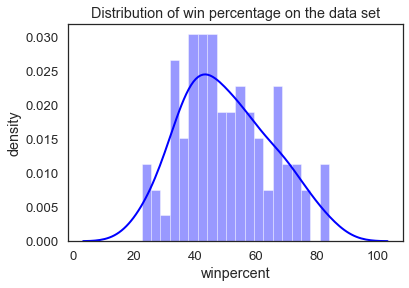

In [13]:
sns.distplot(df_candy[target_name], bins=20, color = 'blue')

plt.title("Distribution of win percentage on the data set")
plt.ylabel("density")
plt.show()

The percentage of won matchups varies from about 20% to 80% between the different brands. Ideally, we want to learn from the data set which characteristics make a candy more likely to win a matchup against its competitors.

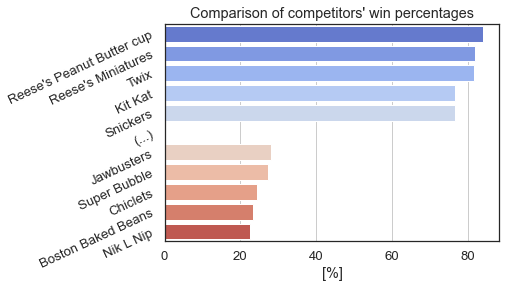

In [14]:
df_aux = df_candy.loc[:,['competitorname','winpercent']].sort_values(by='winpercent', ascending=False).reset_index(drop=True)
df_aux.competitorname = df_aux.competitorname.str.replace('Õ',"\'")
df_aux = df_aux[(df_aux.winpercent>76) | (df_aux.winpercent<30)]

# blank row between top and bottom competitors
df_aux.iloc[5,0] = "(...)"
df_aux.iloc[5,1] = np.nan

sns.barplot(x=df_aux['winpercent'], y=df_aux['competitorname'], palette = palette_style)
plt.xlabel("[%]")
plt.ylabel("")
plt.yticks(rotation=25)
plt.grid(axis='x')

plt.title("Comparison of competitors' win percentages")

plt.savefig("./plots/competitors_win_bar_plot",bbox_inches = 'tight')
plt.show();

Top and bottom performers.

## Univariate analysis - boolean variables

In [15]:
df_candy[bool_feature_list].sum().sort_values(ascending=False)

pluribus            44
fruity              38
chocolate           37
bar                 21
hard                15
peanutyalmondy      14
caramel             14
crispedricewafer     7
nougat               7
dtype: int64

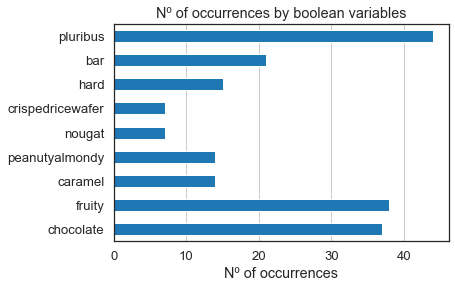

In [16]:
df_candy[bool_feature_list].sum().plot.barh()
plt.xlabel("Nº of occurrences")
plt.grid(axis='x')

plt.title("Nº of occurrences by boolean variables")

plt.show();

- Higher number of occurrences for: chocolate, fruity, and pluribus.
- Nougat and crispedricewafer present in less than 10% of the sample: caution when drawing conclusions! 

Let's see how each characteristic alone affects the percentage of won matchups.

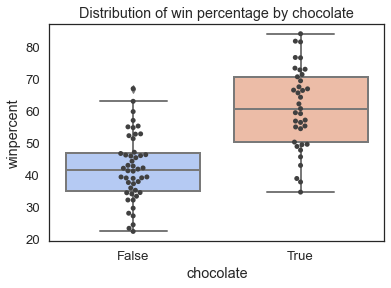

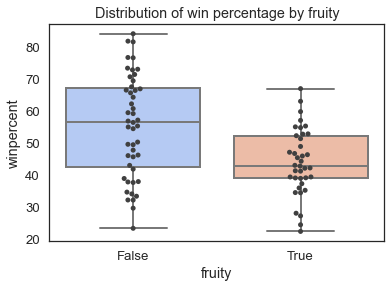

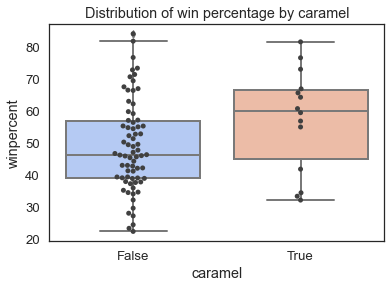

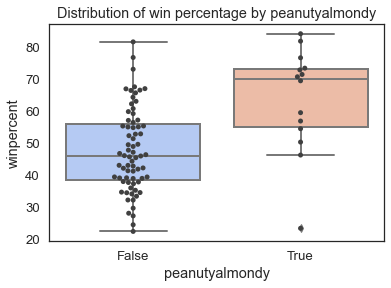

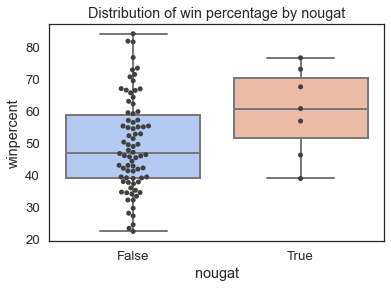

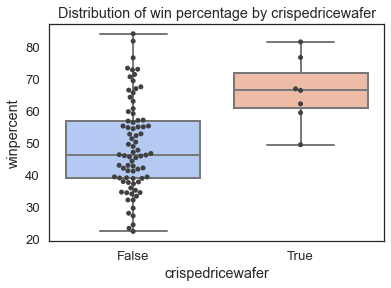

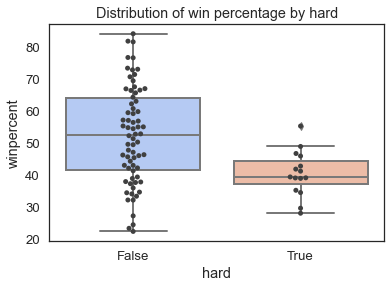

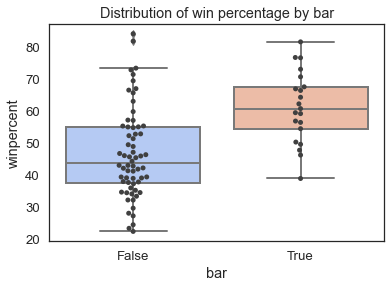

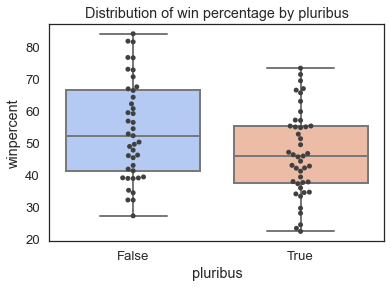

In [17]:
for feature_name in bool_feature_list:
    
    ax = sns.boxplot(x=feature_name, y=target_name, data=df_candy, palette=palette_style)
    ax = sns.swarmplot(x=feature_name, y=target_name, data=df_candy, color=".25")
    
    # Format plot title
    plot_title_str = 'Distribution of win percentage by {}'.format(feature_name)    
    plt.title(plot_title_str)
    
    # Format file name
    file_name_str = "./plots/target_dist_by_{}".format(feature_name)
    plt.savefig(file_name_str)
    
    plt.show();

Observations:
- The average winning rate of candies having chocolate was 20 p.p. higher when compared with the remaining candies in the sample (not containing chocolate).
- Fruit flavor seems to have a negative effect (we will comment on this latter).

Below, just a different approach with the same purpose.

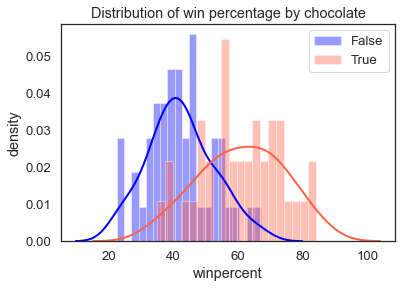

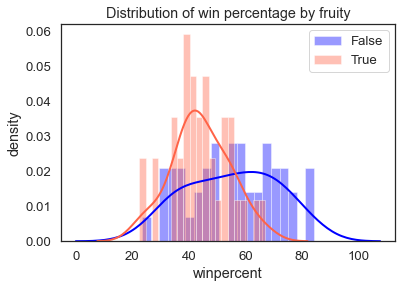

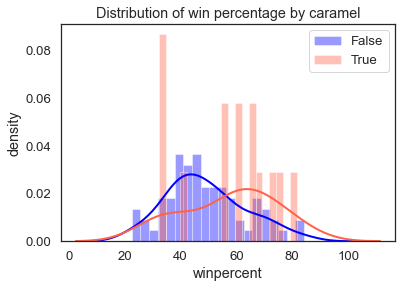

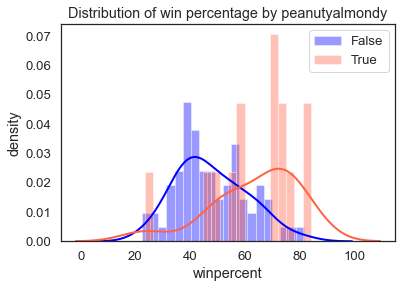

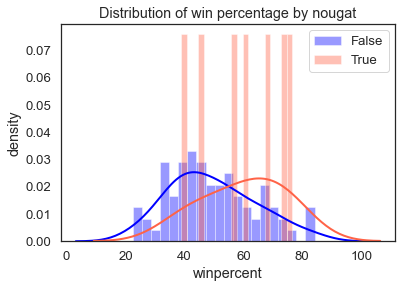

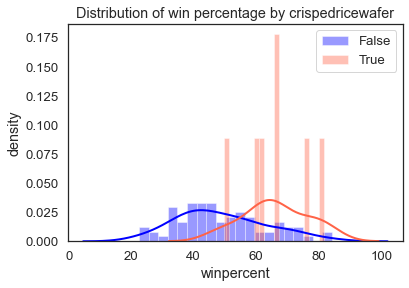

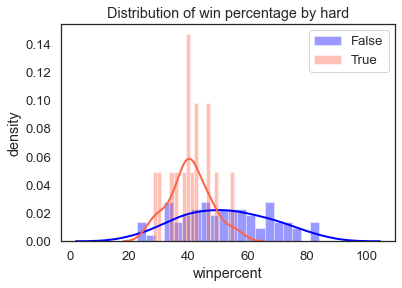

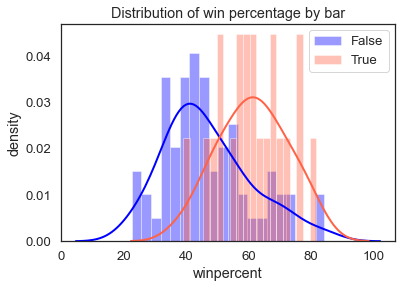

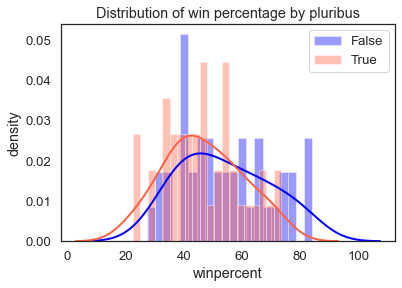

In [18]:
for feature_name in bool_feature_list:
    
    sns.distplot(df_candy.loc[df_candy[feature_name]==False, target_name], bins=20, color = 'blue', label='False')
    sns.distplot(df_candy.loc[df_candy[feature_name]==True, target_name], bins=20, color = 'tomato', label='True')
    
    # Format plot title
    plot_title_str = 'Distribution of win percentage by {}'.format(feature_name)
    plt.ylabel("density")
    plt.title(plot_title_str)
    
    plt.legend()
    plt.show()

## Univariate analysis - numerical variables

Equivalent analysis for continuous variables. A scatter plot with the regression line superimposed.

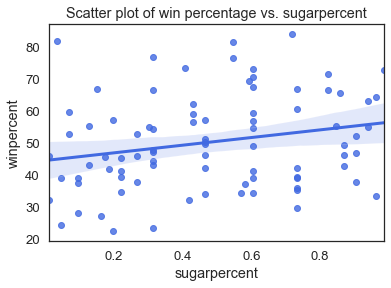

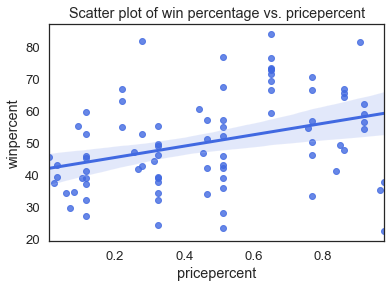

In [19]:
for feature_name in numeric_feature_list:
    
    ax = sns.regplot(x=feature_name, y=target_name, data=df_candy, color='royalblue')
    
    # Format plot title
    plot_title_str = 'Scatter plot of win percentage vs. {}'.format(feature_name)    
    plt.title(plot_title_str)
    
    # Format file name
    file_name_str = "./plots/target_regression_by_{}".format(feature_name)
    plt.savefig(file_name_str)
    
    plt.show();


## Multivariate analysis

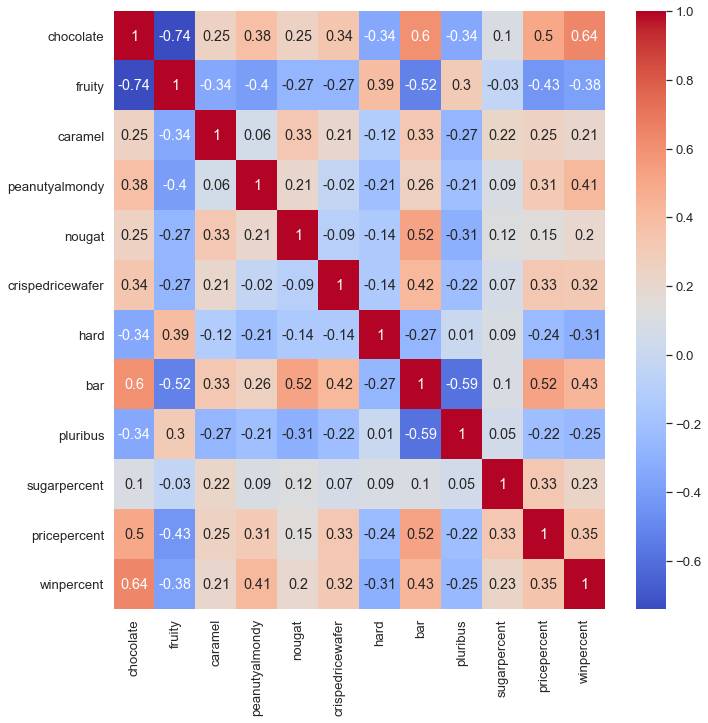

In [20]:
corr = df_candy.corr().round(decimals=2)

# Hide upper right diagonal
mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(11,11))
sns.heatmap(data=corr, mask=mask, annot=True, cmap='coolwarm')
plt.show()

Observations from the correlation matrix:
- Percentage of won matchups seems to be mainly affected by the presence of chocolate. The remaining categories seem to impact wins (positively or negatively) with comparable magnitudes.
- As a consequence of previous observation, we remark that the impact of price on matchup results seems to be in line with the impact of remaining categories (except chocolate).
- Fruit flavored most of the times means no chocolate, and vice-versa.
- Sugar content is very well balanced among all categories, except price (cheaper candies also have lower sugar levels).  
- Chocolate is sold at significantly higher prices than average whereas fruit-flavored at lower prices.
- Chocolate frequently comes in bar-shaped candies, also with peanut/almond, crisp texture, and nougat or caramel. The opposite happens with fruit-flavored candies, which frequently miss those categories.

### Combination of boolean features one-by-one.

Two main characteristics define the candies: either contain chocolate or are fruity flavored. The combination of the two happens just once.

In [21]:
feat1 = 'chocolate'
feat2 = 'fruity'
df_aux = pd.DataFrame(np.zeros((2, 2)), index=[[feat1, feat1],['Yes','No']], columns=[[feat2, feat2],['Yes','No']])

idx = pd.IndexSlice
df_aux.loc[idx[feat1,'No'], idx[:,'No']] = df_candy[(df_candy[feat1]==False) & (df_candy[feat2]==False)].count()[0]
df_aux.loc[idx[feat1,'No'], idx[:,'Yes']] = df_candy[(df_candy[feat1]==False) & (df_candy[feat2]==True)].count()[0]
df_aux.loc[idx[feat1,'Yes'], idx[:,'No']] = df_candy[(df_candy[feat1]==True) & (df_candy[feat2]==False)].count()[0]
df_aux.loc[idx[feat1,'Yes'], idx[:,'Yes']] = df_candy[(df_candy[feat1]==True) & (df_candy[feat2]==True)].count()[0]
assert df_aux.sum().sum() == 85
df_aux.astype(int)

fruity    
                 Yes  No
chocolate Yes      1  36
          No      37  11

Let's see how these two main characteristics combine with the remaining ones.

In [22]:
columns = [feat for feat in bool_feature_list if feat!='chocolate' and  feat!='fruity']
df_aux = pd.DataFrame(np.zeros((2, 7)), index=['chocolate', 'fruity'], columns=[columns])

for feat in columns:
    df_aux.loc['chocolate', feat] = df_candy[(df_candy['chocolate']==True) & (df_candy[feat]==True)].count()[0]
    df_aux.loc['fruity', feat] = df_candy[(df_candy['fruity']==True) & (df_candy[feat]==True)].count()[0]
    
df_aux

,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
chocolate,10.0,12.0,6.0,7.0,1.0,20.0,12.0
fruity,1.0,0.0,0.0,0.0,13.0,0.0,26.0


# Statistical analysis using OLS regression

## Baseline  
Simple OLS regression with all features included.

In [23]:
reg_formula_str = target_name + ' ~ ' + ' + '.join([col for col in df_candy.columns[:] if col!=target_name and col!='competitorname'])
print(reg_formula_str)

winpercent ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + bar + pluribus + sugarpercent + pricepercent


In [24]:
result = sm.ols(formula=reg_formula_str, data=df_candy).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.797
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           9.50e-09
Time:                        08:36:30   Log-Likelihood:                -315.64
No. Observations:                  85   AIC:                             655.3
Df Residuals:                      73   BIC:                             684.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

With the baseline configuration (i.e., including all variables as they came) we were able to attain an adjusted R squared of 47.1%.  
Some of the features are clearly irrelevant in explaining the variation of the dependent variable. For example `caramel`, `nougat`, `bar`, and `pluribus` have p-values above 50%, and the price a p-value of 28.6%.  
`chocolate` clearly appears as the most important factor, with a coefficient of about 20 p.p. and a standard error of 3.9 p.p.. `fruity`, `peanutyalmondy`, `crispedricewafer`, `hard`, and `sugarpercent` also seem to be important. We will explore these features deeper in the next section.  
The biggest surprise was to find a positive coefficient for the `fruity` attribute. Based on the plot titled 'Distribution of win percentage by fruity' we would expect a negative coefficient. What happens is that fruity also means no chocolate (see the negative coefficient in the correlation matrix). Although both features have a positive effect, the chocolate coefficient is twice the size, so when we select `fruity` candies we see the positive effect of this feature but we don't see the positive effect of `chocolate`, and the overall effect becomes negative.

## Alternative specifications  

We have tried several alternative specifications for the regression equation. This was done by removing different features (simultaneously or separately) and trying their combination to investigate:
- whether there was a significant change in the magnitude and standard error of the coefficients (robustness).
- the best configuration in terms of adjusted R-squared (best fit).  

In the end, we have chosen to use `winpercent ~ chocolate + fruity + chocolate_peanutyalmondy + chocolate_crispedricewafer + fruity_hard + highsugar` (where the underscore in the name of the features means that characteristics before and after the underscore are both present and highsugar means above 80th percentile of sugar content), obtaining an adjusted R-squared of 52.3%.

In [25]:
# select a subset of columns to use
df_test = df_candy.loc[:,['winpercent','chocolate','fruity','peanutyalmondy','crispedricewafer','hard','sugarpercent']]
# create boolean feature chocolate & peanutyalmondy
df_test.loc[:,'chocolate_peanutyalmondy'] = (df_test.loc[:,'chocolate']==True) & (df_test.loc[:,'peanutyalmondy']==True)
# create boolean feature chocolate & crispedricewafer
df_test.loc[:,'chocolate_crispedricewafer'] = (df_test.loc[:,'chocolate']==True) & (df_test.loc[:,'crispedricewafer']==True)
# create boolean feature fruity & hard
df_test.loc[:,'fruity_hard'] = (df_test.loc[:,'fruity']==True) & (df_test.loc[:,'hard']==True)
# create boolean feature high sugar content.
df_test.loc[:,'highsugar'] = df_test.loc[:,'sugarpercent'] > 0.8
# drop columns we will not use in the regression
df_test = df_test.drop(columns=['crispedricewafer','peanutyalmondy', 'hard', 'sugarpercent'])
df_test.columns

Index(['winpercent', 'chocolate', 'fruity', 'chocolate_peanutyalmondy',
       'chocolate_crispedricewafer', 'fruity_hard', 'highsugar'],
      dtype='object')

In [26]:
reg_formula_str = target_name + ' ~ ' + ' + '.join([col for col in df_test.columns[:] if col!=target_name and col!='competitorname'])
print(reg_formula_str)

winpercent ~ chocolate + fruity + chocolate_peanutyalmondy + chocolate_crispedricewafer + fruity_hard + highsugar


In [27]:
result_test = sm.ols(formula=reg_formula_str, data=df_test).fit()
print(result_test.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     16.36
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           4.23e-12
Time:                        08:36:30   Log-Likelihood:                -314.04
No. Observations:                  85   AIC:                             642.1
Df Residuals:                      78   BIC:                             659.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

# Conclusions

Considering the complete data set, the average winning rate is 50.3% in 85 products. If we consider only competitors having the two characteristics identified as most important (i.e., higher regression coefficients), we are left with 12 products with an average winning rate of 68.5%. This is a substantial increase that should be taken into account in the new product specification. If we drop one of these attributes then the average winning rate decreases to 47.3%, and if neither are present, which happens in 46 products (more than half of the products), the average winning rate decreases even further to 42.5%.  

Summing up, a chocolate candy with peanuts, peanut butter, or almonds in it is likely to perform well above average.  

Finally, high sugar (above 80th percentile) content also seems to be important. And indeed, when we consider the three characteristics: chocolate with peanut/almond included and a high level of sugar, the winning rate further increases to 72.2%. However, since we are left with only two products, it was a little risky to make strong conclusions and we decided to consider only the two attributes with a higher contribution to performance.

Count and average winning rate in the complete data set:

In [28]:
df_candy.winpercent.describe()[:2].round(1)

count    85.0
mean     50.3
Name: winpercent, dtype: float64

Count and average winning rate if the product contains chocolate and peanutyalmondy:

In [29]:
df_candy.loc[(df_candy.chocolate==True) & (df_candy.peanutyalmondy==True),:].winpercent.describe()[:2]

count    12.000000
mean     68.503791
Name: winpercent, dtype: float64

Count and average winning rate if the product does not contains the two attributes together: 

In [30]:
df_candy.loc[(df_candy.chocolate==False) | (df_candy.peanutyalmondy==False),:].winpercent.describe()[:2]

count    73.000000
mean     47.327115
Name: winpercent, dtype: float64

Count and average winning rate if the product contains neither of the two attributes:

In [31]:
df_candy.loc[(df_candy.chocolate==False) & (df_candy.peanutyalmondy==False),:].winpercent.describe()[:2]

count    46.000000
mean     42.458998
Name: winpercent, dtype: float64

Count and average winning rate if the product contains all the three most important attributes:

In [32]:
df_candy.loc[(df_candy.chocolate==True) & (df_candy.peanutyalmondy==True) & (df_candy.sugarpercent>0.8),:].winpercent.describe()[:2]

count     2.000000
mean     72.176476
Name: winpercent, dtype: float64

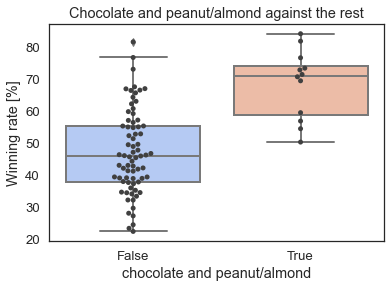

In [33]:
ax = sns.boxplot(x='chocolate_peanutyalmondy', y=target_name, data=df_test, palette=palette_style)
ax = sns.swarmplot(x='chocolate_peanutyalmondy', y=target_name, data=df_test, color=".25")
 
plt.title('Chocolate and peanut/almond against the rest')
plt.ylabel("Winning rate [%]")
plt.xlabel("chocolate and peanut/almond")

plt.savefig("./plots/final_plot")

plt.show();